In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv('data/hotels_merged.csv')

df=df.drop(columns = 'Unnamed: 0')

df.sort_values("hotelName", inplace = True) 

df.drop_duplicates(subset ="hotelName", 
                     keep = 'first', inplace = True)

df.drop(df.columns[[10,11,12,13,14,15,16,17]],axis =1, inplace = True)

In [7]:
df.head()

,hotelName,url,zipcode,totalRatings,hotelRate,totalPhotos,priceRange,highlights_1,highlights_2,highlights_3
0,AC Hotel by Marriott - Washington,https://www.yelp.com/biz/ac-hotel-by-marriott-...,20036,3,0.0,17,none,none,none,none
35,AC Hotel by Marriott National Harbor Washingto...,https://www.yelp.com/biz/ac-hotel-by-marriott-...,20745,81,3.5,174,$$,capital wheel,Gaylord,few nights
66,AKA Virginia Square,https://www.yelp.com/biz/aka-virginia-square-a...,22201,6,3.5,11,$$,none,none,none
101,AKA White House,https://www.yelp.com/biz/aka-white-house-washi...,20006,61,3.5,97,$$$,one bedroom,Farmers,hotel bar
129,Alexandria Motel,https://www.yelp.com/biz/alexandria-motel-alex...,22306,3,4.5,4,$,none,none,none


In [8]:
df.describe()

,zipcode,totalRatings,hotelRate,totalPhotos
count,260.000000,260.000000,260.000000,260.000000
mean,20910.473077,94.830769,3.290385,126.692308
std,969.137209,113.091219,0.809752,189.433186
min,20001.000000,2.000000,0.000000,0.000000
25%,20007.000000,26.750000,3.000000,41.000000
50%,20745.000000,62.000000,3.500000,79.000000
75%,22182.000000,121.500000,4.000000,156.250000
max,22314.000000,1073.000000,4.500000,2029.000000


# Outliers for HR-#TR

## hotelRate=0

In [3]:
df[df['hotelRate']==0]

,hotelName,url,zipcode,totalRatings,hotelRate,totalPhotos,priceRange,highlights_1,highlights_2,highlights_3
0,AC Hotel by Marriott - Washington,https://www.yelp.com/biz/ac-hotel-by-marriott-...,20036,3,0.0,17,none,none,none,none
5127,Home2 Suites by Hilton Silver Spring,https://www.yelp.com/biz/home2-suites-by-hilto...,20903,4,0.0,55,none,none,none,none
5726,Hyatt Centric Old Town Alexandria,https://www.yelp.com/biz/hyatt-centric-old-tow...,22314,5,0.0,19,none,none,none,none
7157,Motel 6 Washington,https://www.yelp.com/biz/motel-6-washington-wa...,20012,20,0.0,46,$$,none,none,none
7174,Motel 6 Washington DC/Convention Center,https://www.yelp.com/biz/motel-6-washington-dc...,20002,9,0.0,41,$$,none,none,none
9499,The Georgetown House,https://www.yelp.com/biz/the-georgetown-house-...,20007,16,0.0,22,$,M streets,air bnb,code
10966,TownePlace Suites by Marriott- College Park,https://www.yelp.com/biz/towneplace-suites-by-...,20740,2,0.0,59,none,none,none,none
11448,WhyHotel Arlington Pentagon Columbia Pike,https://www.yelp.com/biz/whyhotel-arlington-pe...,22204,3,0.0,31,$$,none,none,none


In [4]:
df[df['hotelRate']==0].describe()

,zipcode,totalRatings,hotelRate,totalPhotos
count,8.00000,8.00000,8.0,8.000000
mean,20777.25000,7.75000,0.0,36.250000
std,981.52749,6.75595,0.0,16.412104
min,20002.00000,2.00000,0.0,17.000000
25%,20010.75000,3.00000,0.0,21.250000
50%,20388.00000,4.50000,0.0,36.000000
75%,21228.25000,10.75000,0.0,48.250000
max,22314.00000,20.00000,0.0,59.000000


Most of them has no highlights. low #TR. Total count = 8

# Visualization

## HR-#TR

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

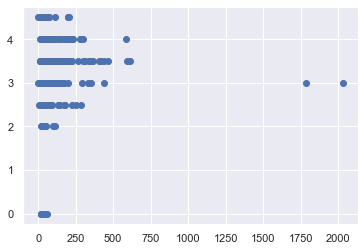

In [31]:
x1=df['totalRatings']
y1=df['hotelRate']
plt.scatter(x, y)

In [47]:
print('HR_mean:', y1.mean())
print('#TR_mean:', x1.mean())
print('count:',x1.count())

HR_mean: 3.2903846153846152
#TR_mean: 94.83076923076923
count: 260


### #TR Less than 200

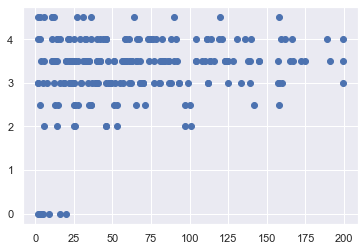

In [33]:
x1_200less=df[df['totalRatings']<=200]['totalRatings']
y1_200less=df[df['totalRatings']<=200]['hotelRate']
plt.scatter(x1_200less, y1_200less)

In [46]:
print('HR_mean:', y1_200less.mean())
print('#TR_mean:', x1_200less.mean())
print('count:',x1_200less.count())

HR_mean: 3.2860262008733625
#TR_mean: 64.1877729257642
count: 229


### #TR More than 200

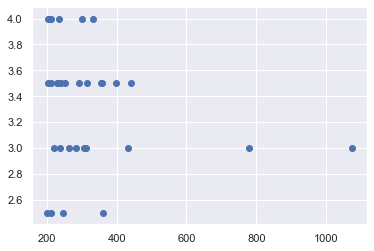

In [39]:
x1_200more=df[df['totalRatings']>200]['totalRatings']
y1_200more=df[df['totalRatings']>200]['hotelRate']
plt.scatter(x1_200more, y1_200more)

In [40]:
print('mean:', y1_200more.mean())
print('count:',x1_200more.count())

mean: 3.3225806451612905
count: 31


### #TR <= 400 & Ratings>0

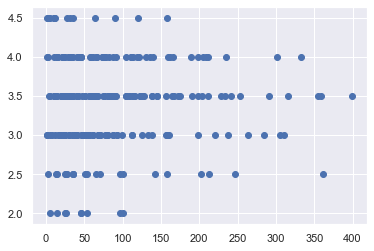

In [44]:
### #TR More than 200x1_pHR_400=df[(df['hotelRate']!=0) & (df['totalRatings']<=400)]['totalRatings']
y1_pHR_400=df[(df['hotelRate']!=0) & (df['totalRatings']<=400)]['hotelRate']
plt.scatter(x1_pHR_400, y1_pHR_400)

In [45]:
print('mean:', y1_pHR_400.mean())
print('count:',x1_pHR_400.count())

mean: 3.399193548387097
count: 248


Findings: 
> HR>0
> #TR<=400

Observaion: 248/260


## PR = 'none'

In [9]:
df[df['priceRange']=='none'].describe()

,zipcode,totalRatings,hotelRate,totalPhotos
count,19.000000,19.000000,19.000000,19.000000
mean,20687.631579,12.210526,2.605263,45.052632
std,896.365948,18.650526,1.523692,56.058971
min,20001.000000,2.000000,0.000000,0.000000
25%,20007.000000,3.000000,2.000000,21.000000
50%,20037.000000,5.000000,3.000000,32.000000
75%,20838.500000,13.500000,3.500000,52.000000
max,22314.000000,84.000000,4.500000,264.000000


In [10]:
df[df['priceRange']!='none'].describe()

,zipcode,totalRatings,hotelRate,totalPhotos
count,241.000000,241.000000,241.000000,241.000000
mean,20928.041494,101.344398,3.344398,133.128631
std,974.207771,114.860974,0.702421,194.732841
min,20001.000000,2.000000,0.000000,0.000000
25%,20007.000000,34.000000,3.000000,45.000000
50%,20745.000000,68.000000,3.500000,85.000000
75%,22182.000000,125.000000,4.000000,165.000000
max,22314.000000,1073.000000,4.500000,2029.000000


PR 빼고/
